In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [2]:
tf.__version__

'2.14.0'

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 256

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/plantvillage/PlantVillage",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    shuffle=True
)

Found 27086 files belonging to 29 classes.


2024-01-07 05:00:23.508775: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-07 05:00:23.508897: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-07 05:00:23.509008: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-07 05:00:23.509098: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-07 05:00:23.509198: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-07 05:00:23.509396: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2024-01-07 05:00:23.509463: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [5]:
27068/256

105.734375

In [6]:
len(dataset)

106

In [7]:
print(dataset.class_names)
classes = len(dataset.class_names)
print(classes)

['Apple Black rot', 'Apple Healthy', 'Apple Scab', 'Cedar apple rust', 'Cherry Healthy', 'Cherry Powdery mildew', 'Corn Common rust', 'Corn Gray leaf spot', 'Corn Healthy', 'Corn Northern Leaf Blight', 'Grape Black Measles', 'Grape Black rot', 'Grape Healthy', 'Grape Isariopsis Leaf Spot', 'Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
29


In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())
    print(image_batch[0].numpy().astype('uint8'))
#     print(image_batch[0].numpy()) # print numpy array of rgb color of first image of first batch.

(256, 256, 256, 3)
[21  3 14  8 19 20  8  9 10 11  2 22 16 11  0  8  3  2  8 26 28  8 14  4
  8 12 15  1 25  5  1  3  9  4 22 25  5 20  0 12 23 25 19 23 20  4 21 28
 21 11 19  8 25 12 23 28  8  4 20  9  3  7  8  1 20 15  0 26 21  8 15 28
 20 20  0 14  9  4  3 24 19  4 23 23 20 24 12 17 21 12  8 12 14 24 10  8
 21  8 20  8 28 22  8  5 13 10 15 15 14  8  5 20 19 25 19 24 21  7 26 15
 26  2 19 24 25  1  5  8 12  5 26 11  2 22 20 24 12  7  6  1 24  3 12 16
  2 19 12 19  8 11 14  6 28 25 16  2  8  8  8  8  8 24 27 20 24 20  6  2
  4  8  5 12  3  2  4 15  2  4 23  9  8 10 25  8 26 23  7  9  8 19 24 14
 19 14 26 14 13  8  5  6 21 17 22 11 15 22  8  1  9 23 28 22  7 16 11 11
 17 16 15 26 21 13 15  5 16 17 26  2  8 12 20 17  2 12  8 25  5  2 20  8
  6  3 24 17 10  8 24 28 20  8 10  5  8 22 24 28]
[[[152. 133. 135.]
  [155. 136. 138.]
  [153. 134. 136.]
  ...
  [165. 153. 153.]
  [163. 151. 151.]
  [161. 149. 149.]]

 [[151. 132. 134.]
  [153. 134. 136.]
  [153. 134. 136.]
  ...
  [166. 154. 154

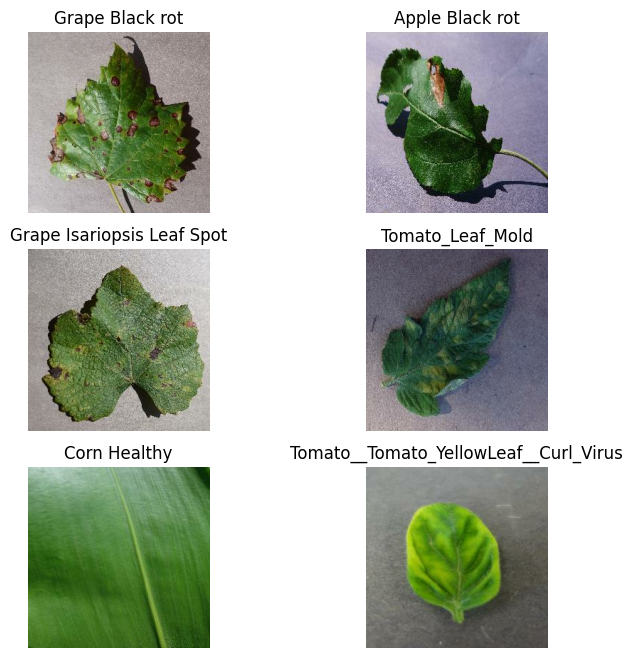

In [9]:
class_names = dataset.class_names
plt.figure(figsize=(8,8))
for image_batch,label_batch in dataset.take(1):
    for i in range(6):
        plt.subplot(3,2,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
def get_partition_ds(ds, train_per = 0.8, test_per = 0.1, val_per = 0.1, shuffle = True, shuffle_size = 1000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 42)
    train_size = int(train_per*len(ds))
    val_size = int(val_per*len(ds))

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, test_ds, val_ds

In [11]:
train_set, test_set, val_set = get_partition_ds(dataset)

In [12]:
len(train_set)

84

In [13]:
len(test_set)

12

In [14]:
len(val_set)

10

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

In [17]:
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_set = val_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), input_shape = input_shape, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(29, activation='softmax')
])
model.build(input_shape=input_shape)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 256, 3)        0         
                                                                 
 conv2d (Conv2D)             (256, 254, 254, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (256, 127, 127, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (256, 125, 125, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (256, 62, 62, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (256, 60, 60, 64)        

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_set,
    batch_size=BATCH_SIZE,
    validation_data=val_set,
    verbose=1,
    epochs=18,
)

Epoch 1/18
84/84 [==============================] - 378s 4s/step - loss: 2.8623 - accuracy: 0.1969 - val_loss: 2.2183 - val_accuracy: 0.3287
Epoch 2/18
84/84 [==============================] - 365s 4s/step - loss: 1.7847 - accuracy: 0.4707 - val_loss: 1.4339 - val_accuracy: 0.5725
Epoch 3/18
84/84 [==============================] - 367s 4s/step - loss: 1.1941 - accuracy: 0.6434 - val_loss: 0.9847 - val_accuracy: 0.6912
Epoch 4/18
84/84 [==============================] - 367s 4s/step - loss: 0.9036 - accuracy: 0.7218 - val_loss: 0.7673 - val_accuracy: 0.7526
Epoch 5/18
84/84 [==============================] - 368s 4s/step - loss: 0.7350 - accuracy: 0.7724 - val_loss: 0.5988 - val_accuracy: 0.8060
Epoch 6/18
84/84 [==============================] - 369s 4s/step - loss: 0.6116 - accuracy: 0.8072 - val_loss: 0.5405 - val_accuracy: 0.8295
Epoch 7/18
84/84 [==============================] - 369s 4s/step - loss: 0.5146 - accuracy: 0.8366 - val_loss: 0.4694 - val_accuracy: 0.8522
Epoch 8/18
84

In [22]:
scores = model.evaluate(test_set)

12/12 [==============================] - 19s 1s/step - loss: 0.1888 - accuracy: 0.9414


In [44]:
history.params

{'verbose': 1, 'epochs': 18, 'steps': 84}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
type(history.history['loss'])

list

In [26]:
len(history.history['loss'])

18

In [27]:
len(history.history['accuracy'])

18

In [28]:
history.history['loss'][:5] # show loss for first 5 epochs

[2.8623385429382324,
 1.7847013473510742,
 1.194103717803955,
 0.9035743474960327,
 0.735029935836792]

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

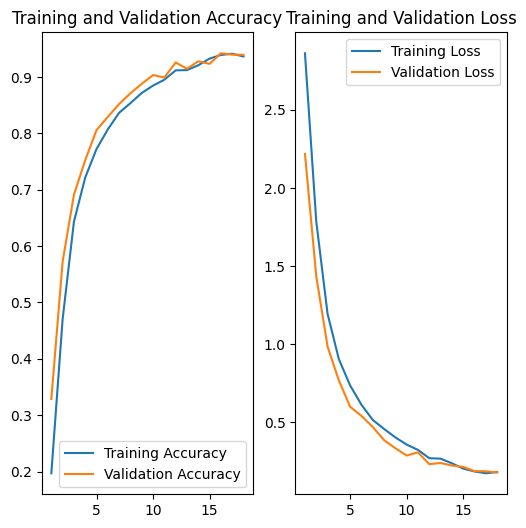

In [31]:
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1,18+1), acc, label='Training Accuracy')
plt.plot(range(1,18+1), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1,18+1), loss, label='Training Loss')
plt.plot(range(1,18+1), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict......
Actual label:  Tomato__Target_Spot
8/8 [==============================] - 1s 123ms/step
Predicted label:  Tomato__Target_Spot


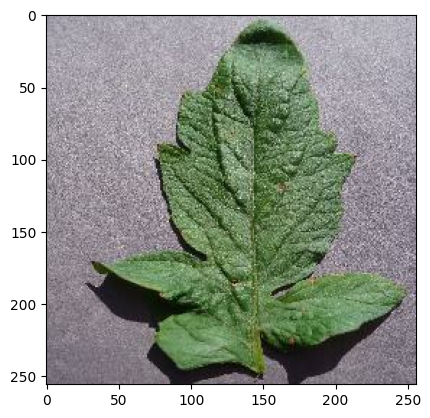

In [32]:
import numpy as np
for images_batch, labels_batch in test_set.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("First image to predict......")
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


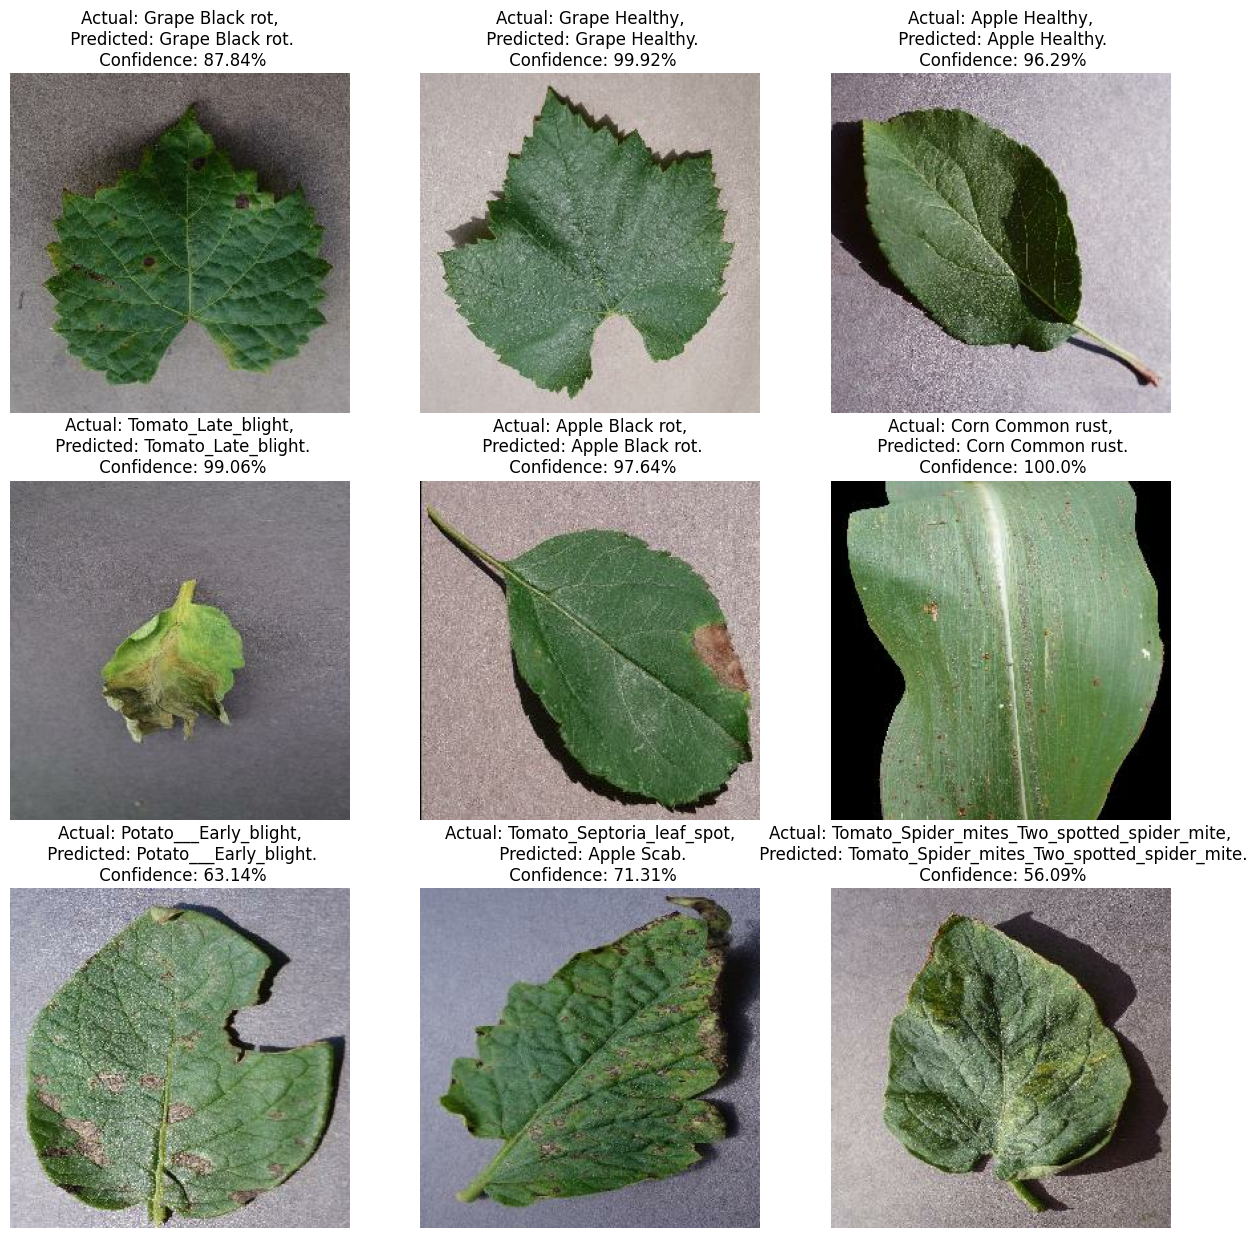

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [35]:
model.save("/kaggle/working/")

INFO:tensorflow:Assets written to: /kaggle/working/assets


INFO:tensorflow:Assets written to: /kaggle/working/assets


In [36]:
model.save("my_model.h5")

/usr/local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
model.save("my_model.keras")

In [38]:
new_model = models.load_model("my_model.h5")

In [34]:
import joblib
# Save Plant_Model to file in the current working directory
joblib_file = "Plant_Model.pkl"  
joblib.dump(model, joblib_file)

['Plant_Model.pkl']

In [35]:
# Load from file
joblib_model = joblib.load(joblib_file)
joblib_model

In [39]:
# score = joblib_model.evaluate(test_set)
# s = test_set[0]
for image_batch, label_batch in test_set.take(1):
    ans = new_model.predict(image_batch)
    print(class_names[label_batch[0]])
    print(class_names[np.argmax(ans[0])])

# print("Test score: {0:.2f} %".format(100 * score[1]))

8/8 [==============================] - 1s 130ms/step
Corn Gray leaf spot
Corn Gray leaf spot
